# Banking Term Deposit Subscription



### Table of contents

1. [Problem Statement](#introduction)
2. [Data](#data)
	- 2.1 [Description of Data features](#datafeatures)
	- 2.2 [Exploratory Data Analysis](#eda)
	- 2.3 [Create dummy variables for Catagorical features](#dummy)
3. [Modeling](#modeling)
	- 3.1 [Create test and training set](#testandtrain)
	- 3.2 [Null Accuracy](#null)
	- 3.3 [Evaluation Metrics](#evaluation)
	- 3.4 [Sampling and Fitting models](#sampling)
		- 3.4.1 [Fitting Classifiers with default Hyperparameters and Stratified Fold K=10](#default)
		- 3.4.2 [Random Over Sampling (ROS)](#ROS)
		- 3.4.3 [Synthetic Minority Oversampling Technique (SMOTE)](#SMOTE)
		- 3.4.4 [Random Under Sampling (RUS)](#RUS)
	- 3.5 [Feature Selection and Hyper Parameters Tuning](#featureslection)
		- 3.5.1 [Optimal Feature Count and Chi-Squared Feature Selection ](#featureslection1)
		- 3.5.2 [Hyperparameter Tuning](#featureslection2)
		- 3.5.3 [Fitting Models on Selected Hyper Params and Feature importance evaluation](#featureslection3)
	- 3.6 [Evaluating Model Performance](#performance)
4. [Conclusion](#conclusion)
5. [References](#reference)

<div class="alert alert-info"><h3>
Problem Statement<a class="anchor" id="introduction"></a>
</h3></div>

A common method to solicit bank deposit subscriptions in the banking industry is to call a prospective client with an offer of attractive interest rates through directed marketing campaigns. In order to conduct an efficient marketing campaign, contacts are targeted to achieve a successful result, which is a deposit subscription in this case. Here I describe the development and identification of a model that can explain the odds of success based on several explanatory variables related to each contact. Two classifiers, Random Forest and Logistic regression are compared in terms of accuracy. If the classifier has high accuracy, the banks can arrange a better management of available resources by focusing on the potential customers “picked” by the classifier, which will improve their efficiency a lot.[3]  

In [1]:
# import the machinelearning toolkit
from Death2GridSearch import *

#imports
import pandas as pd
import numpy as np
import pickle

#plotting
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.ensemble  import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

seed =100

<div class="alert alert-info"><h3>
Data<a class="anchor" id="data"></a>
</h3></div>


Data used in this analysis was collected from a Portuguese marketing campaign related with bank deposit subscription for 45211 clients and 20 features, and the response is whether the client has subscribed a term deposit. The data set is downloaded from http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [2]:
#load Data
data = pd.read_csv('data/modeling.csv')
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed,Age_Group,Quarter
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,46-64,Q2
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,31-45,Q2


**Description of Data features**<a class="anchor" id="datafeatures"></a>

|# | Feature |What is it? |Type|Example|Comments if any|
|------|------|------|-------|------|------|
|   1  | age| How old|numeric| 20||
|   2  | job|type of job| categorical| admin.,unknown,unemployed,management,...,services||
|   3  | marital| marital status|categorical| married,divorced,single|divorced means divorced or widowed|
|   4  | education| Level of schooling|categorical| unknown,secondary,primary,tertiary||
|   5  | default|  has credit in default? |binary| yes, no||
|   6  | balance| average yearly balance, in euros|numeric| 2143||
|   7  | housing| is the housing on loan?|binary| yes, no||
|   8  | loan| has personal loan?|binary| yes, no|related with the last contact of the current campaign|
|   9  | contact| contact communication type|categorical| unknown,telephone,cellular||
|   10  | day| last contact day of the month|binary| yes, no||
|   11  | month| last contact month of year|Categorical| jan, feb, mar, ..., nov, dec||
|   12  | duration| last contact duration, in seconds|numeric| 23||
|   13  | campaign| number of contacts performed during this campaign and for this client|numeric| 34|includes last contact|
|   14  | pdays| number of days that passed by after the client was last contacted from a previous campaign |numeric| 1|-1 means client was not previously contacted|
|   15  |previous| number of contacts performed before this campaign and for this client|numeric| 0||
|   16  | poutcome| outcome of the previous marketing campaign|categorical| unknown,other,failure,success||
|   17  |Subscribed| has the client subscribed a term deposit?| categorical|0, 1|Output variable (desired target), 0=no, 1=yes|
|   18  |Age_group| age binning| categorical|46-64|Engineered feature from age|
|   19  |Quarter| Quarter of the year| categorical|Q1, Q2, Q3, Q4|Engineered feature from month|


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
age           45211 non-null int64
job           45211 non-null object
marital       45211 non-null object
education     45211 non-null object
default       45211 non-null object
balance       45211 non-null int64
housing       45211 non-null object
loan          45211 non-null object
contact       45211 non-null object
day           45211 non-null int64
month         45211 non-null object
duration      45211 non-null int64
campaign      45211 non-null int64
pdays         45211 non-null int64
previous      45211 non-null int64
poutcome      45211 non-null object
Subscribed    45211 non-null int64
Age_Group     45211 non-null object
Quarter       45211 non-null object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


**Exploratory Data Analysis** <a class="anchor" id="eda"></a>

This study included the examination of various methods of exploratory data analysis including summary statistics, frequency tables, scatter plots, boxplots and histogram distributions by individual or paired explanatory factors that are highlighted by the “Subscribed” response factor.  This provides a visual initial understanding of each factors relationship to the subscription response variable. A detail exporatory analysis is done on a separate notebook ``(ExploratoryDataAnalysis.ipynb)``

Here, there are three factors of interest explored from the training data set used in the final model that we discuss. The code block that follows in **R**

In [1]:
#load the required packages
pacman::p_load(pacman, dplyr, ggplot2,plotrix, ggpubr, readr, scales,gridExtra, formattable, repr,ggcorrplot)

In [13]:
# load data
data<-read.table('data/modeling.csv', sep =",", header = TRUE)

dim(data)

[1] 45211    19

In [16]:
str(data)
data$Subscribed<-as.factor(data$Subscribed)# convert the Subscribed column to factors

'data.frame':	45211 obs. of  19 variables:
 $ age       : int  58 44 33 47 33 35 28 42 58 43 ...
 $ job       : Factor w/ 12 levels "admin.","blue-collar",..: 5 10 3 2 12 5 5 3 6 10 ...
 $ marital   : Factor w/ 3 levels "divorced","married",..: 2 3 2 2 3 2 3 1 2 3 ...
 $ education : Factor w/ 4 levels "primary","secondary",..: 3 2 2 4 4 3 3 3 1 2 ...
 $ default   : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 2 1 1 ...
 $ balance   : int  2143 29 2 1506 1 231 447 2 121 593 ...
 $ housing   : Factor w/ 2 levels "no","yes": 2 2 2 2 1 2 2 2 2 2 ...
 $ loan      : Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 2 1 1 1 ...
 $ contact   : Factor w/ 3 levels "cellular","telephone",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ day       : int  5 5 5 5 5 5 5 5 5 5 ...
 $ month     : Factor w/ 12 levels "apr","aug","dec",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ duration  : int  261 151 76 92 198 139 217 380 50 55 ...
 $ campaign  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays     : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previou

#### Subsciption by month

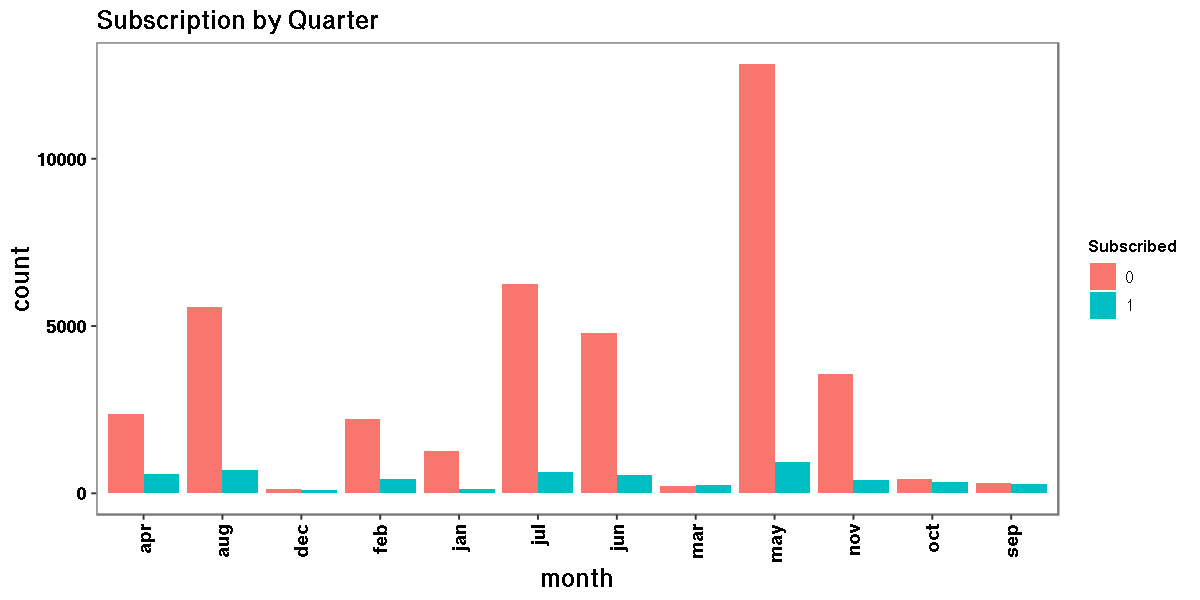

In [158]:
#subscription by Quarter
options(repr.plot.width=10, repr.plot.height=5)
month = factor(data$month , levels = month.abb)
#print(month)
A<-ggplot(data, aes(x=month,fill=Subscribed)) +
  geom_bar(position = "dodge")+stat_count(mapping=aes(x=month,y=..prop..))+labs(title = "Subscription by Quarter")# + coord_flip()

A <-A + theme_pubr(legend = "right") + border("gray48") + labs_pubr() + rotate_x_text(90)
A

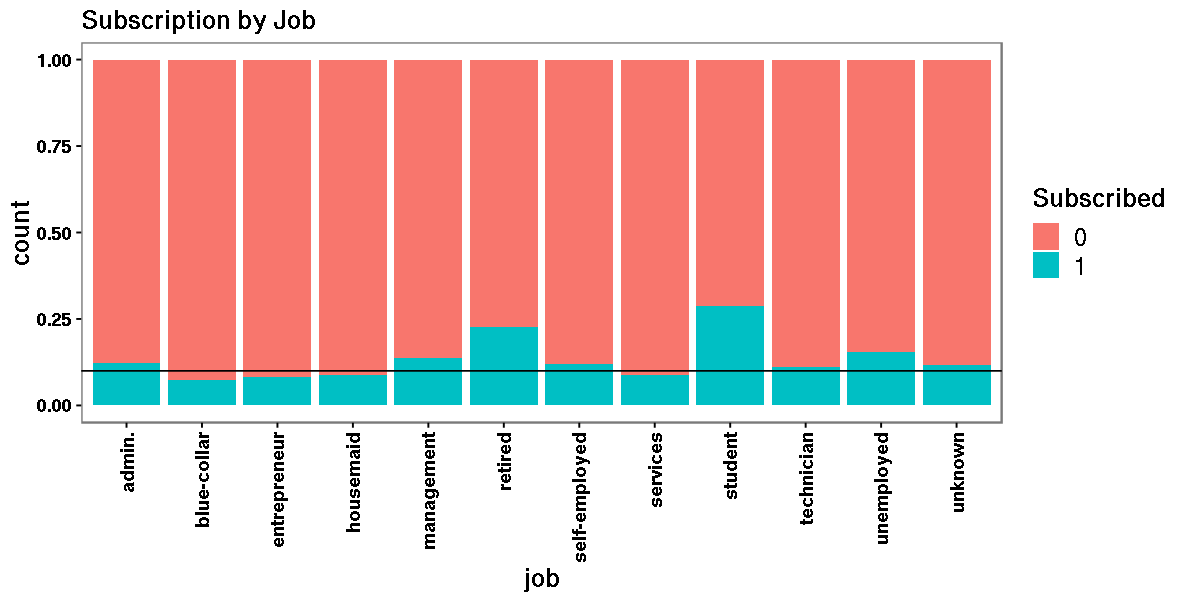

In [162]:
options(repr.plot.width=10, repr.plot.height=5)
q =ggplot(data, aes(job, fill=Subscribed))+ geom_bar(position="fill")+labs(title = "Subscription by Job")+
geom_hline(yintercept = .10)

q <-q + theme_pubr(legend = "right") + border("gray48") + labs_pubr() + rotate_x_text(90)
ggpar(q, font.legend = 16)

visualized ad-hoc A/B test shows that job type is an important variable in deciding the subscription for term deposit. 

### Contact Duration

In [31]:
A = data%>%
    select(duration, Subscribed)%>%
    group_by(Subscribed)%>%
    summarise(Contact_Duration_avg =mean(duration),
             Contact_Duration_median = median(duration))

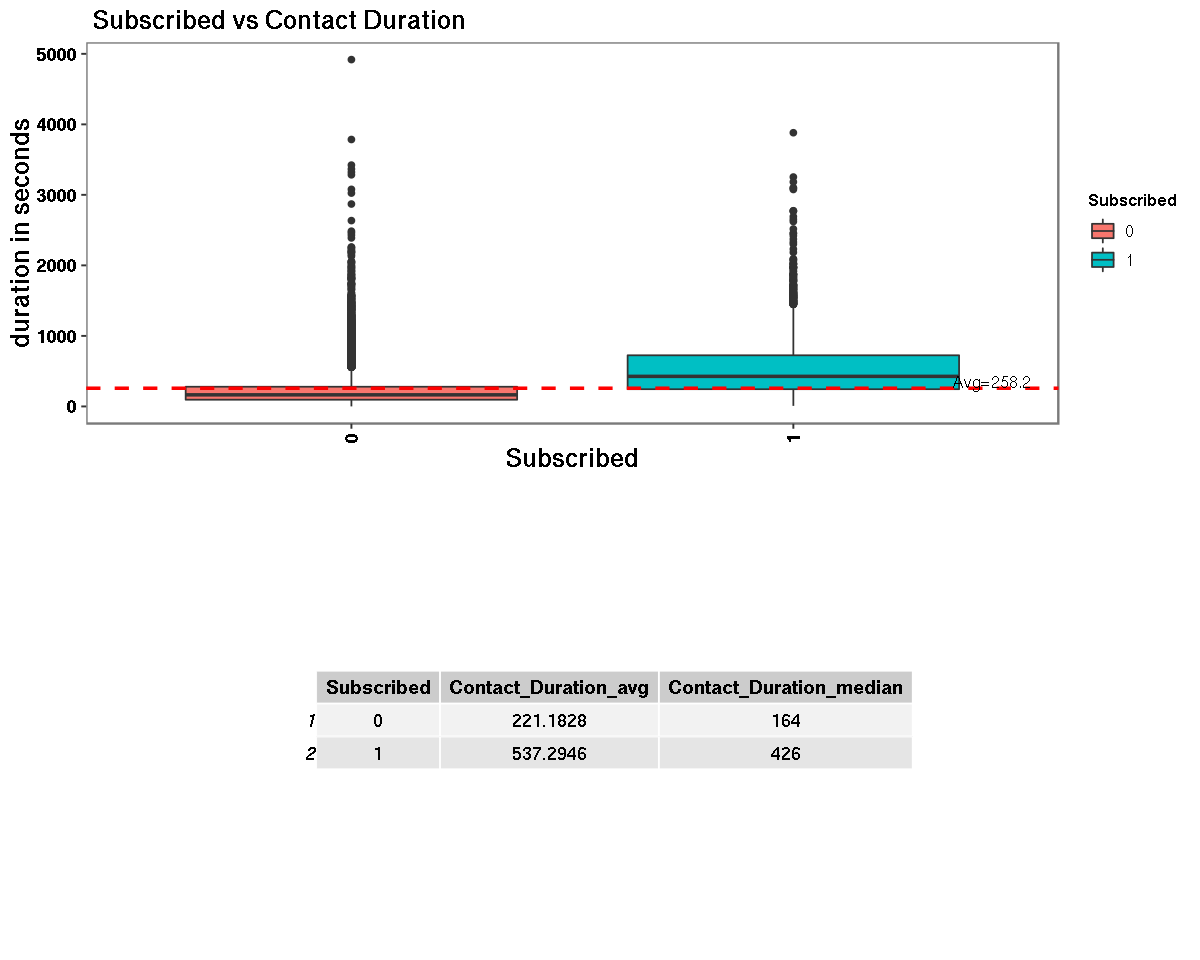

In [154]:
options(repr.plot.width=10, repr.plot.height=8)
avgduration <-mean(data$duration)
mean_d <- data.frame( x = c(-Inf, Inf), y = avgduration, mean_d = factor(avgduration) )

B =ggplot(data, aes(y =duration, x = Subscribed, fill = Subscribed)) +
  geom_boxplot()+ theme_light()+labs(title=" Subscribed vs Contact Duration", y = "duration in seconds")+
  theme(plot.title = element_text(hjust = 0.5))+
  geom_hline(yintercept = avgduration, colour="red", linetype="dashed", size=1) +
  annotate("text", 2.45, avgduration+90, label = paste0("Avg=", round(avgduration, 1)), color ="black" )
B <-B + theme_pubr(legend = "right") + border("gray48") + labs_pubr() + rotate_x_text(90)



grid.arrange(B, tableGrob(A), ncol=1)

The dashed red-line shows the mean for the entire training data set (258 sec).  Contact duration for the group of clients `Subscribed` (**1**) to the term deposit is higher than that for the group `not Subscribed` (**0**). Note  greater than 400 seconds has a higher likelihood of a yes to the subscription.  

In [115]:
summary1<-data%>%
select(Subscribed,Quarter,Subscribed,education,job,marital, balance, duration)%>%
group_by(Subscribed,marital,job)%>%
summarise(duration=median(duration),
          Count  =n(),
         balance =median(balance))
head(summary1)

Subscribed,marital,job,duration,Count,balance
0,divorced,admin.,160.5,660,295.0
0,divorced,blue-collar,172.5,692,219.5
0,divorced,entrepreneur,169.5,164,287.5
0,divorced,housemaid,145.0,166,367.0
0,divorced,management,147.0,969,350.0
0,divorced,retired,186.5,304,478.0


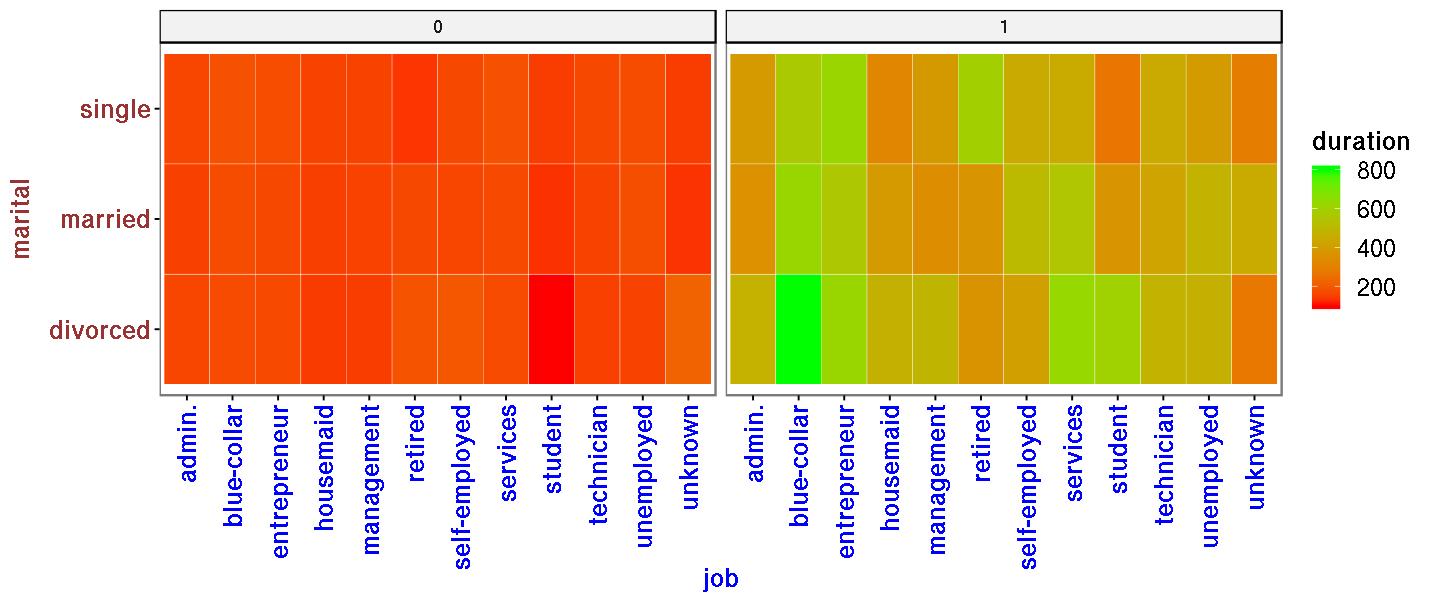

In [166]:
options(repr.plot.width=12, repr.plot.height=5)
q<-ggplot(summary1, aes(job,marital, fill = duration)) + 
  geom_tile(colour = "white") + 
  facet_grid(~Subscribed)+ 
  scale_fill_gradient(low="red", high="green")+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

q <-q + theme_pubr(legend = "right") + border("gray48") + labs_pubr() + rotate_x_text(90)

q <- ggpar(q, font.legend = 16)

q +  font("title", size = 14, color = "red", face = "bold.italic")+
 font("caption", size = 10, color = "orange")+
 font("xlab", size = 16, color = "blue")+
 font("ylab", size = 16, color = "#993333")+
 font("x.text", size = 14, color = "blue", face = "bold") +
 font("y.text", size = 16, color = "#993333", face = "bold")

The heat map above visually indicates that call duration is critical for term Subscription. The subscirbed clients tended to have longer call durations

**Create dummy variables for Catagorical features**<a class="anchor" id="dummy"></a>

In [6]:
%%time
def dummy_Create(df, reponse_var):
    '''
    Function to create dummy variables for catagorical features
    
    df = dataframe
    response_var = respose variable 
    '''
    
    rawData = df.copy()
    SchoolDataCat = rawData.loc[:,(rawData.dtypes == object) |(rawData.dtypes == 'category')|(rawData.dtypes == bool)]
    
    
    print(SchoolDataCat.columns)
    cat_vars=SchoolDataCat.columns
    for var in cat_vars:
        cat_list='var'+'_'+var
        cat_list = pd.get_dummies(rawData[var], prefix=var)
        df=pd.concat([df,cat_list], axis=1)
    data=df
    cat_vars=SchoolDataCat.columns
    data_vars=data.columns.values.tolist()
    
    to_keep=[i for i in data_vars if i not in cat_vars]

    ## Final data columns
    data_final=data[to_keep]
    data_final.columns.values
    data_final_vars=data_final.columns.values.tolist()
    #return(SchoolDataCat)
    y=[reponse_var]
    X=[i for i in data_final_vars if i not in y]
 
    list(data_final_vars)
    print(y)
    #print(X)
    SchoolDataCat.describe().T
    return(data_final.abs())


data_raw = data.copy()  #Make a copy of the data
#drop features that we engineered new features from age and month
data_raw = data_raw.drop(['age', 'month'], axis=1)


modelingdata = dummy_Create(data_raw, 'Subscribed')


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'Age_Group', 'Quarter'],
      dtype='object')
['Subscribed']
CPU times: user 170 ms, sys: 17.9 ms, total: 188 ms
Wall time: 187 ms


In [7]:
modelingdata.head()

,balance,day,duration,campaign,pdays,previous,Subscribed,job_admin.,job_blue-collar,job_entrepreneur,...,poutcome_unknown,Age_Group_20-30,Age_Group_31-45,Age_Group_46-64,Age_Group_65+,Age_Group_<20,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4
0,2143,5,261,1,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,29,5,151,1,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
2,2,5,76,1,1,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
3,1506,5,92,1,1,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
4,1,5,198,1,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0


In [8]:
modelingdata.shape

(45211, 48)

<div class="alert alert-info"><h3>
Modeling<a class="anchor" id="modeling"></a>
</h3></div>

Below is a flow chart of modeling approach.

<img src="reference/dataSplitting.png" width="600" height="600" />

#### Create test and training set <a class="anchor" id="testandtrain"></a>

Prior to construction of the model, a training and test data set were created by randomly splitting the data into 70 training and 30% test set. for reproduciblity a seed is used.  

In [11]:
%%time
#Create data = x
Cls_X = modelingdata.copy()
#create target = Y
Cls_y = Cls_X.Subscribed
print('X shape before ')
print(Cls_X.shape)
#drop the response column from the x dataset
Cls_X.pop('Subscribed') # drop 
print('X shape after ')
print(Cls_X.shape)
print('Y shape after ')
print(Cls_y.shape)

X shape before 
(45211, 48)
X shape after 
(45211, 47)
Y shape after 
(45211,)
CPU times: user 6.43 ms, sys: 1.81 ms, total: 8.24 ms
Wall time: 7.23 ms


above cell we split data to X and respose variable y ("Subscribed")

***Using train_test_split to hold out 30% of data for testing.***

In [12]:
#Split data to  into train and holding set.
X_train,X_test,y_train,y_test = train_test_split(Cls_X, Cls_y, test_size = 0.3, random_state = seed)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(31647, 47)
(31647,)
(13564, 47)
(13564,)


### Null accuracy<a class="anchor" id="null"></a>

In [13]:
# Explore distribuion of our class

print("our class distibution")
print(Cls_y.value_counts())

# calculate the percentage of ones
print('Percentage of ones: ', round(Cls_y.mean(),4))

# calculate the percentage of zeros
print('Percentage of Zeros: ',round(1 - Cls_y.mean(),4))

# calculate null accuracy 
print('')
print('##############################')
print('NULL Accuracy: ', max(round(Cls_y.mean(),4), round(1 - Cls_y.mean(),4)))
print('##############################')


our class distibution
0    39922
1     5289
Name: Subscribed, dtype: int64
Percentage of ones:  0.117
Percentage of Zeros:  0.883

##############################
NULL Accuracy:  0.883
##############################


For the code above we calculate a null accuracy of 88.3% on our whole dataset. That means that a dumb model that always predicts majority predictor in our case 0 would be right 88.3% of the time. When evaluating our model performance, we will be looking to ensure the they shows classification accuracy better than that of a dumb model. 

We are dealing with a very imbalance class as such some sampling will be needed to insure the minority class is included in the training set. The plan will be to use stratified k-fold and some form of sampling

### Evaluation Metrics<a class="anchor" id="evaluation"></a>

Precision, Recall(sensitivity/TPR), F1-score and accruacy are some metrics that can be calculated from the confusion matrix. 

- **Precision**: is how precise the classifier is in predicting the positive class. In other words, when the classifier predicted `yes` or `1` for a client being Subscribed for bank term deposit, how often was it right? This can be calculated from confusion matrix as TP/ (TP + FP). Low false positives lead to high precision. 
- **Recall**: is the ratio of correctly predicted positive observations to the all observations in actual class. In other words, when the actual value was `1`, how often did the classifier predict correctly. This is calculated from confusion matrix as TP/ (TP + FN). This is also known as True Positive Rate (TPR) or Sensitivity. That is, how sensitive the classifier is to detecting positive instances.
- **F1-score**: is the harmonic mean of precision and recall. 2.(precision. recall)/ (precision + recall). This takes both FP and FN into account. Intuitively this is a bit difficult to understand and report to a wider audience.
- **accuracy_score**: The most common metric for classification is accuracy, which is the fraction of samples predicted correctly. Accuracy is calculated as (TP + TN )/ (TP + FN + TN + FP)


**Confusion Matrix**

Let's now define the most basic terms, which are whole numbers (not rates):

- **true positives (TP):** These are cases in which we predicted yes (Client is Subscribed to bank term deposit), and they are in deed Subscribed.
- **true negatives (TN):** We predicted no, and they are not Subscribed.
- **false positives (FP):** We predicted yes, but they are not Subscribed. (Also known as a "Type I error.")
- **false negatives (FN):** We predicted no, but they are actually Subscribed. (Also known as a "Type II error.")

Reference: https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

### Sampling and Fitting Models <a class="anchor" id="evaluation"></a>

#### First model fitting using default Classifiers and Stratified Fold K=10<a class="anchor" id="evaluation"></a>

In [14]:
Classification_cv = StratifiedKFold(n_splits = 10, random_state = seed)
Classification_cv

StratifiedKFold(n_splits=10, random_state=100, shuffle=False)

Starting with `Logistic Regression` because of its simplicity and `Random Forest` because of it's superior performance.

In [15]:
%%time
from sklearn.model_selection import GridSearchCV 
param_grid = {} 
rf_clf = RandomForestClassifier(n_jobs=2, random_state=seed) 
rf_clf_cv = GridSearchCV(rf_clf, param_grid, cv=Classification_cv, scoring ='accuracy' ) 
rf_clf_cv.fit(X_train, y_train) 

# predict and calculate auc on test data
print('Training Accuracy Score :',rf_clf_cv.best_score_)

Training Accuracy Score : 0.8969570575409992
CPU times: user 1.51 s, sys: 120 ms, total: 1.63 s
Wall time: 4.57 s


In [16]:
%%time
param_grid = {} 
lr_clf = LogisticRegression(n_jobs=2, random_state=seed) 
lr_clf_cv = GridSearchCV(lr_clf, param_grid, cv=Classification_cv, scoring ='accuracy' ) 
lr_clf_cv.fit(X_train, y_train) 

# predict and calculate auc on test data
print('Training Accuracy Score :',lr_clf_cv.best_score_)

Training Accuracy Score : 0.9008120832938351
CPU times: user 5.61 s, sys: 6.59 s, total: 12.2 s
Wall time: 2.67 s


Good news, our 10 fold startified accuracy for both of our classifiers with default hyper params are greater than the the .88 null accuracy that we calculated above. 



As we saw previously, we are dealing with imbalanceed classes. Next we will check the effect of undersampling and over sampling

#### Random Over Sampling<a class="anchor" id="ROS"></a>

![title](data/oversampling.JPG)

`Drawback`: TRaining on duplicated data

In [17]:
from imblearn.over_sampling import RandomOverSampler
method =  RandomOverSampler(random_state=100)
X_ROS, y_ROS =method.fit_sample(X_train, y_train)

In [18]:
%%time
rf_clf = RandomForestClassifier(n_jobs=2, random_state=seed) 
rf_clf_cv = GridSearchCV(rf_clf, param_grid, cv=Classification_cv, scoring ='accuracy' ) 
rf_clf_cv.fit(X_ROS, y_ROS)

# predict and calculate auc on test data
print('Training Accuracy Score :',rf_clf_cv.best_score_)

Training Accuracy Score : 0.9760711601102481
CPU times: user 1.81 s, sys: 126 ms, total: 1.93 s
Wall time: 5.12 s


In [19]:
%%time
param_grid = {} 
lr_clf = LogisticRegression(n_jobs=2, random_state=seed) 
lr_clf_cv = GridSearchCV(lr_clf, param_grid, cv=Classification_cv, scoring ='accuracy' ) 
lr_clf_cv.fit(X_ROS, y_ROS)

# predict and calculate auc on test data
print('Training Accuracy Score :',lr_clf_cv.best_score_)

Training Accuracy Score : 0.82335254322225
CPU times: user 7.28 s, sys: 6.79 s, total: 14.1 s
Wall time: 4.46 s


Over sampling significantly improves (~8%) the 10 Fold accuracy for the `Random Forest` Classifier but the acurracy for the `Logistic regression` Classifer degrades by ~8%. 

Random Over Sampling is simple but the model is trained on duplicated data thus we risk over fitting and bias in performance

#### Synthetic Minority Oversampling Technique (SMOTE) <a class="anchor" id="SMOTE"></a>

SMOTE uses characteristics of  KNN nearest neighbors of old cases to create new synthetic cases there by avoiding duplications which can result in overfitting. SMOTE is more sophisticated butthe training is on fake data. 

Reference: https://arxiv.org/pdf/1106.1813.pdf

In [20]:
from imblearn.over_sampling import SMOTE
method = SMOTE(random_state=100)
X_SMOTE, y_SMOTE =method.fit_sample(X_train, y_train)

In [21]:
%%time
rf_clf = RandomForestClassifier(n_jobs=2, random_state=seed) 
rf_clf_cv = GridSearchCV(rf_clf, param_grid, cv=Classification_cv, scoring ='accuracy' ) 
rf_clf_cv.fit(X_SMOTE, y_SMOTE)

# predict and calculate auc on test data
print('Training Accuracy Score :',rf_clf_cv.best_score_)

Training Accuracy Score : 0.9307370154275691
CPU times: user 1.69 s, sys: 66.1 ms, total: 1.76 s
Wall time: 5.02 s


In [22]:
%%time
param_grid = {} 
lr_clf = LogisticRegression(n_jobs=2, random_state=seed) 
lr_clf_cv = GridSearchCV(lr_clf, param_grid, cv=Classification_cv, scoring ='accuracy' ) 
lr_clf_cv.fit(X_SMOTE, y_SMOTE)

# predict and calculate auc on test data
print('Training Accuracy Score :',lr_clf_cv.best_score_)

Training Accuracy Score : 0.9293231198768658
CPU times: user 7.96 s, sys: 6.78 s, total: 14.7 s
Wall time: 5.13 s


SMOTE improves the 10 Fold accuracy for the `Random Forest` Classifier and `Logistic regression` Classifer by ~4%. SMOTE is more realistic that simple Random Over Sampling.

#### Random Under Sampling <a class="anchor" id="RUS"></a>

![title](data/undersampling.JPG)

`Drawback`: Throwing away a lot of good data

In [23]:
from imblearn.under_sampling import RandomUnderSampler
method = RandomUnderSampler(random_state=100)
X_RUS, y_RUS =method.fit_sample(X_train, y_train)

In [24]:
%%time
rf_clf = RandomForestClassifier(n_jobs=2, random_state=seed) 
rf_clf_cv = GridSearchCV(rf_clf, param_grid, cv=Classification_cv, scoring ='accuracy' ) 
rf_clf_cv.fit(X_RUS, y_RUS)

# predict and calculate auc on test data
print('Training Accuracy Score :',rf_clf_cv.best_score_)

Training Accuracy Score : 0.817654986522911
CPU times: user 762 ms, sys: 59.7 ms, total: 822 ms
Wall time: 2.88 s


In [25]:
%%time
param_grid = {} 
lr_clf = LogisticRegression(n_jobs=2, random_state=seed) 
lr_clf_cv = GridSearchCV(lr_clf, param_grid, cv=Classification_cv, scoring ='accuracy' ) 
lr_clf_cv.fit(X_RUS, y_RUS)

# predict and calculate auc on test data
print('Training Accuracy Score :',lr_clf_cv.best_score_)

Training Accuracy Score : 0.8183288409703504
CPU times: user 2.4 s, sys: 4.16 s, total: 6.55 s
Wall time: 592 ms


Random Under Sampling (RUS) degrades the 10 Fold accuracy for both the `Random Forest` Classifier and `Logistic regression` Classifer by ~9%. The new accuracy is worse than the Null accuracy of 88%.

We see a significant improvement in training time with RUS

After reviewing sampling results from `Random Over sampling` (ROS), `Synthetic Minority Oversampling Technique` (SMOTE) and `Random Under Sampling` (RUS), SMOTE out performed RUS and ROS when both algorithms are considered. We will do training of our model based on training data resampled by SMOTE

### Feature Selection and Hyper Parameters Tuning <a class="anchor" id="featureslection"></a>

Like in many real world classification problems where feature importance and choosing the optimal number of features is often unknown a priori, we choose to begin with using prediction accuracy of our model narrow down on a subset of features to use without significantly decreasing prediction accuracy of the classifiers. Below we calculate the accuracies of our Classification methods (Logistic Regression, and Random Forest ) based on a percetage of features selected by Chi-Squared test. Chi-square test measures dependence between our predictor and exploratory variables as such using Chi-Squared test.

In [26]:
X_train = X_SMOTE.copy()
X_train= pd.DataFrame(X_train)
X_train.columns = Cls_X.columns

y_train = y_SMOTE.copy()

#### Optimal Feature Count and Chi-Squared Feature Selection <a class="anchor" id="featureslection1"></a>

In [28]:
%%time
from sklearn import feature_selection

percentiles = range(1, 100, 5)
results = []
results1 = []
results2 = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_val_score(lr_clf, X_train_fs, y_train, cv=Classification_cv.split(X_train_fs, y_train))
    scores1 = cross_val_score(rf_clf, X_train_fs, y_train, cv=Classification_cv.split(X_train_fs, y_train))
    print(i,' LR : ',round(scores.mean(), 4), ' RF :',round(scores1.mean(), 4))
    results = np.append(results, scores.mean())
    results1 = np.append(results1, scores1.mean())


1  LR :  0.7103  RF : 0.7142
6  LR :  0.7301  RF : 0.8304
11  LR :  0.8439  RF : 0.8855
16  LR :  0.8418  RF : 0.89
21  LR :  0.8574  RF : 0.8948
26  LR :  0.8651  RF : 0.9043
31  LR :  0.8847  RF : 0.9152
36  LR :  0.8946  RF : 0.9183
41  LR :  0.8982  RF : 0.9208
46  LR :  0.9007  RF : 0.9225
51  LR :  0.9046  RF : 0.9239
56  LR :  0.9119  RF : 0.9256
61  LR :  0.9192  RF : 0.9293
66  LR :  0.922  RF : 0.9301
71  LR :  0.9235  RF : 0.9303
76  LR :  0.9288  RF : 0.9305
81  LR :  0.9285  RF : 0.9334
86  LR :  0.9313  RF : 0.9315
91  LR :  0.9306  RF : 0.9316
96  LR :  0.9305  RF : 0.9311
CPU times: user 2min 2s, sys: 2min 3s, total: 4min 5s
Wall time: 2min 13s


<Figure size 432x288 with 0 Axes>

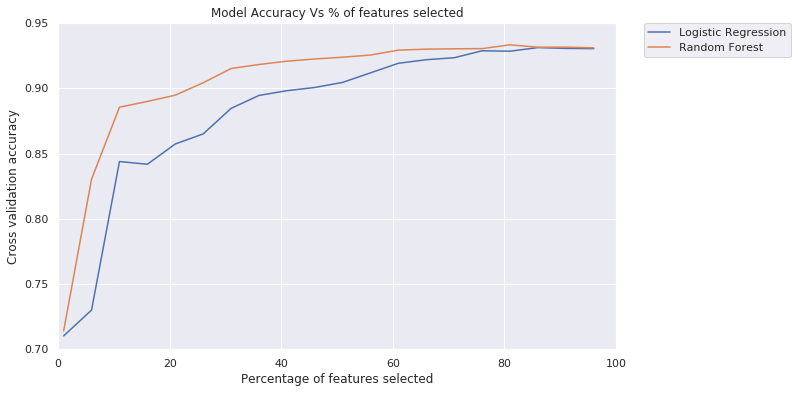

In [29]:
###### Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
f, ax = plt.subplots(figsize=(10, 6))
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results, label="Logistic Regression")
pl.plot(percentiles,results1, label="Random Forest")

plt.axis([0, 100, 0.7, 0.95])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Model Accuracy Vs % of features selected')
plt.grid(True)

Corss validation accuracy for both `Logistic regression`  and  `Random Forest` Classifiers  levels off with ~60% of the features, after which there is no significant gain in accuracy with addition of more features.

We will use Chi-Squared test to select 60% of the features to use for modeling

In [27]:
from sklearn import feature_selection
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=60)
df_X_train_fs = fs.fit_transform(X_train, y_train)

np.set_printoptions(suppress=True, precision=2, linewidth=80)

Chi2_Score = pd.DataFrame()

for i in range(len(X_train.columns.values)):
    if fs.get_support()[i]:
        #print(df_X.columns.values[i],'\t', fs.scores_[i] )
        Feature ={'Feature': X_train.columns.values[i], 'chi-squared':fs.scores_[i]}
        Chi2_Score =Chi2_Score.append(Feature, ignore_index=True)
Chi2_Score.sort_values('chi-squared', ascending=False)   

,Feature,chi-squared
2,duration,3.737231e+06
0,balance,2.533680e+06
4,pdays,2.136762e+05
20,contact_unknown,6.541730e+03
3,campaign,5.770337e+03
17,housing_yes,5.749488e+03
5,previous,4.640705e+03
26,Quarter_Q2,3.938764e+03
7,job_blue-collar,3.615762e+03
18,loan_yes,3.301335e+03


In [28]:
# subset test and train data to selected features above
X_train= X_train[Chi2_Score.Feature]
X_test = X_test[Chi2_Score.Feature]

In [29]:
%%time
param_grid = {} 
rf_clf = RandomForestClassifier(n_jobs=2, random_state=seed) 
rf_clf_cv = GridSearchCV(rf_clf, param_grid, cv=Classification_cv, scoring ='accuracy' ) 
rf_clf_cv.fit(X_train, y_train) 

# predict and calculate auc on test data
print('Training Accuracy Score :',rf_clf_cv.best_score_)

Training Accuracy Score : 0.9283029673909152
CPU times: user 1.7 s, sys: 62.1 ms, total: 1.76 s
Wall time: 5.12 s


In [30]:
%%time
param_grid = {} 
lr_clf = LogisticRegression(n_jobs=2, random_state=seed) 
lr_clf_cv = GridSearchCV(lr_clf, param_grid, cv=Classification_cv, scoring ='accuracy' ) 
lr_clf_cv.fit(X_train, y_train) 

# predict and calculate auc on test data
print('Training Accuracy Score :',lr_clf_cv.best_score_)

Training Accuracy Score : 0.9175645201703834
CPU times: user 6.99 s, sys: 6.69 s, total: 13.7 s
Wall time: 4.17 s


with the reduced feature count the accuracy of both `Logistic Regression` and `Random Forest` Classifiers  barely changes and still stands above the  `88%` null accuracy. The reduced number of features also results in an improved training time.

#### Hyperparameter Tuning <a class="anchor" id="featureslection2"></a>

Next lets do Hyperparameter tuning to see if we get some gain in our accuracy. We will leverage the **`Death2GridSearch.py`** utility that is demoed here https://github.com/kevimwe/Death2GridSearch-Classification.

Hyperpararameters for `Logistic Regression` and `Random Forest`  Classifiers are defined in the `algos.yaml` file stored in the `/setup` folder.

The results for the gridsearch runs along with summaries are saved in the `/results` folder

In [31]:
dataM = X_train
dataM['Subscribed'] =y_train

In [32]:
dataM.head()

,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_management,...,contact_telephone,contact_unknown,poutcome_success,poutcome_unknown,Age_Group_20-30,Age_Group_31-45,Age_Group_46-64,Quarter_Q2,Quarter_Q3,Subscribed
0,4853,31,234,2,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
1,378,8,165,1,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0
2,3440,9,194,1,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,668,14,297,2,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
4,830,17,71,1,138,2,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


Running.... LogisticRegression
Running.... RandomForestClassifier
processing Completed Successfully


,accuracy,precision,recall,f1_score,roc_auc_score
LogisticRegression,0.92,0.94,0.99,0.9,0.92
RandomForestClassifier,0.92,0.91,0.92,0.91,0.92


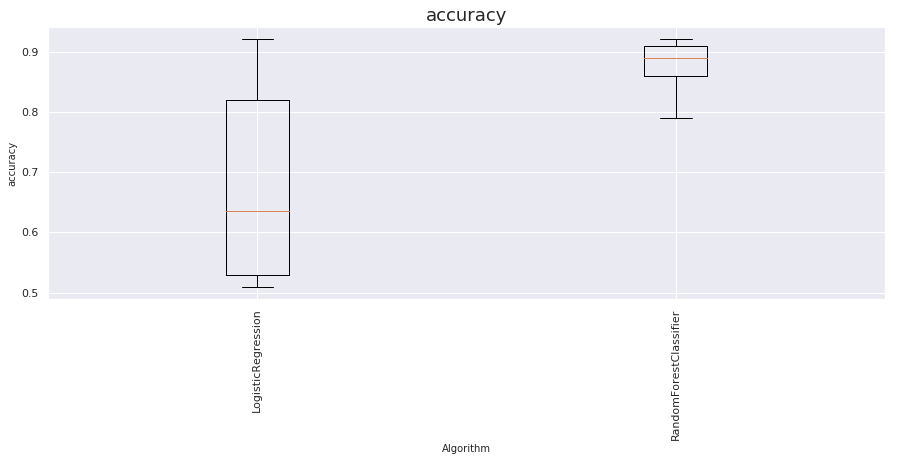

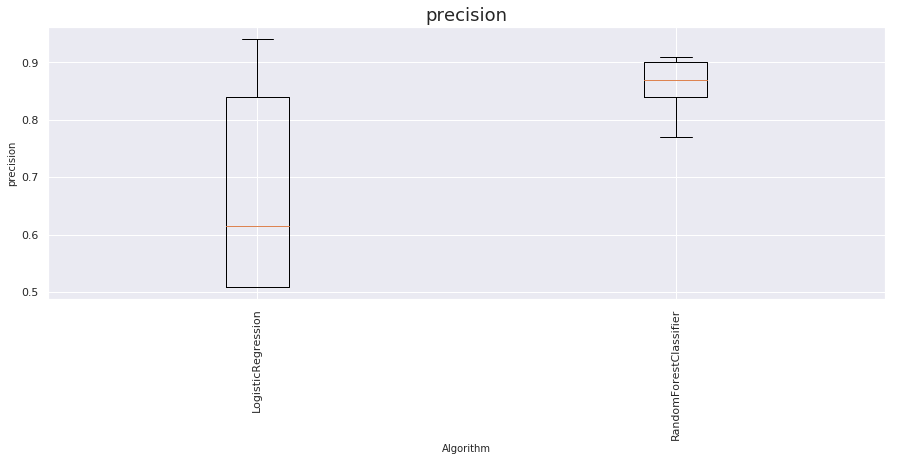

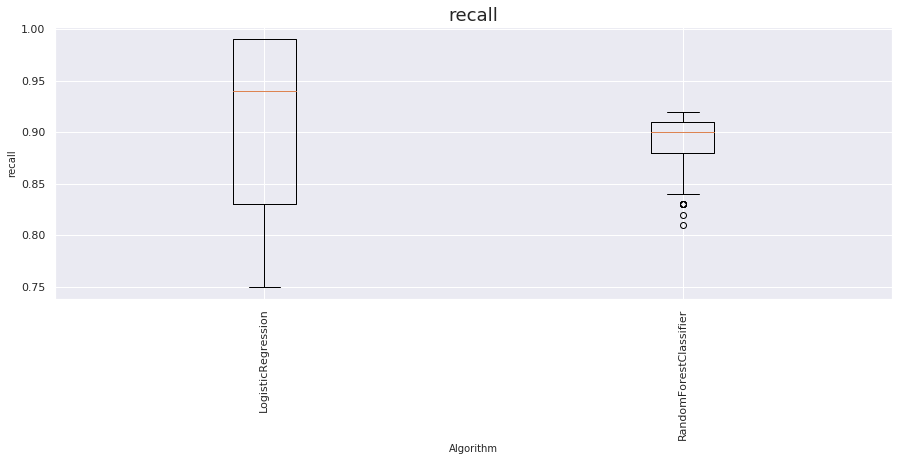

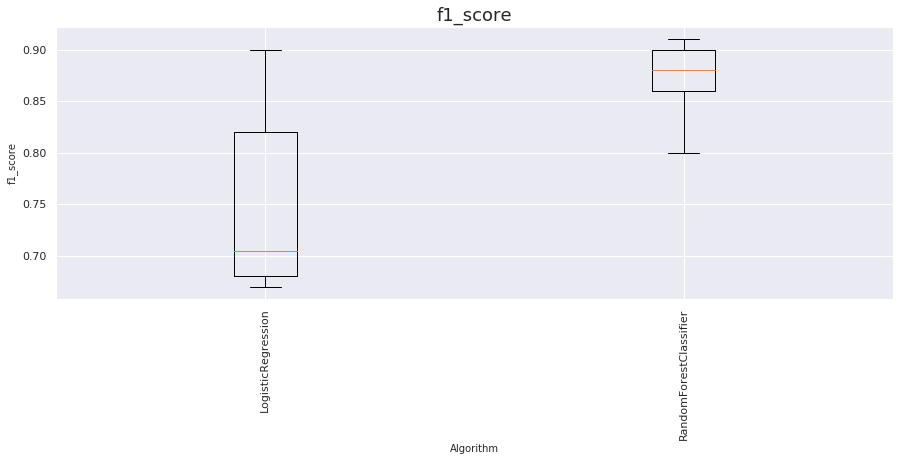

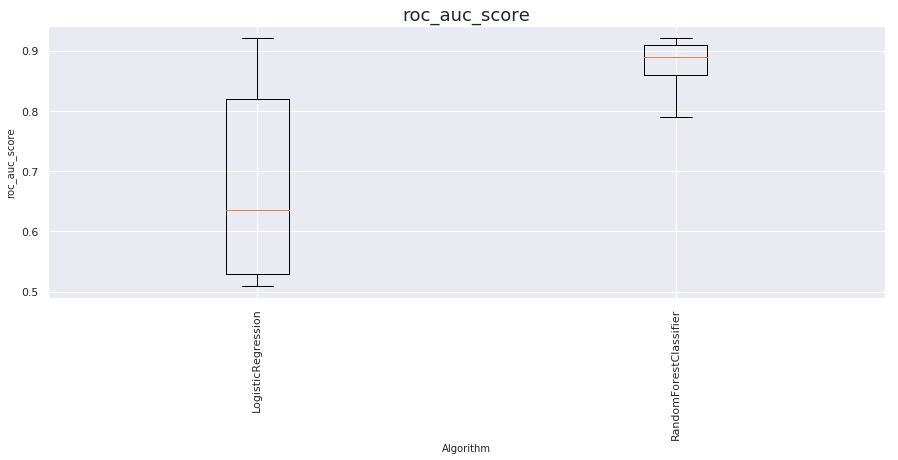

In [40]:
# run main 
main(data =dataM, Response='Subscribed', n_folds=10)

Results of hyperparamater search are saved in results folder. As summarised above, the two algorithms are pretty comparable  in terms of accuracy, f1_score and roc_auc_score when the best set of hyperparmaters is considered for each .  `Logistic regression` slightly out performs `Random Forest` classifier in terms of precion and recall.

Below classification objects from the best perfoming objects models selected by hyper paramter tuning above are created.

Model performance are verified in terms of accuracy.

In [33]:
# pickle test and training data for reproducability

filename1 = 'data/X_train.csv'
filename2 = 'data/y_train.csv'
filename3 = 'data/X_test.csv'
filename4 = 'data/y_test.csv'

In [35]:
# save data to disc
X_train.to_csv(filename1, index=False)
X_test.to_csv(filename3, index=False)
X_test.to_csv(filename2, index=False)
X_test.to_csv(filename4, index=False)

#### Fitting Models on Selected Hyper Params and Feature importance evaluation<a class="anchor" id="featureslection3"></a>

In [32]:
## Load pickled Data

In [47]:
X_train = pickle.load(open(filename1, 'rb'))
y_train = pickle.load(open(filename2, 'rb'))
X_test = pickle.load(open(filename3, 'rb'))
y_test = pickle.load(open(filename4, 'rb'))

In [33]:
lr_clf = LogisticRegression(penalty='l2', C = 0.01, class_weight=None,solver= 'newton-cg', max_iter=100, tol= 0.0001, random_state=seed)
lr_training_scores = cross_val_score(lr_clf ,X_train, y_train, cv=Classification_cv)
print("---------------------------------")
print("10 Fold Logistic Classification runs")
print("---------------------------------")
print(lr_training_scores )
print("---------------------------------")
print('Mean Training Accuracy:', np.average(lr_training_scores))
print("---------------------------------")

#save the model to disk
filename_lr = 'pickled/finalized_Logistic_model.sav'
pickle.dump(lr_clf, open(filename_lr, 'wb'))
lr_clf

---------------------------------
10 Fold Logistic Classification runs
---------------------------------
[0.66 0.88 0.95 0.96 0.95 0.95 0.95 0.95 0.96 0.96]
---------------------------------
Mean Training Accuracy: 0.9178193335880863
---------------------------------


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=100, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
rf_clf = RandomForestClassifier(max_features='auto',criterion='entropy', max_depth=10,  n_estimators=5,min_samples_leaf=1, random_state=seed)

rf_training_scores = cross_val_score(rf_clf ,X_train, y_train, cv=Classification_cv)
print("---------------------------------")
print("10 Fold Random Forest Classification runs")
print("---------------------------------")
print(rf_training_scores )
print("---------------------------------")
print('Mean Training Accuracy:', np.average(rf_training_scores))
print("---------------------------------")

#save the model to disk
# save the model to disk
filename_rf = 'pickled/finalized_RandomForest_model.sav'
pickle.dump(rf_clf, open(filename_rf, 'wb'))
rf_clf

---------------------------------
10 Fold Random Forest Classification runs
---------------------------------
[0.7  0.87 0.94 0.94 0.94 0.94 0.94 0.94 0.95 0.94]
---------------------------------
Mean Training Accuracy: 0.9099258269408054
---------------------------------


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

                     importance
duration               1.549896
marital_married        1.369977
marital_single         1.113423
Age_Group_31-45        1.101170
Age_Group_46-64        0.934861
marital_divorced       0.795750
Age_Group_20-30        0.636859
contact_unknown        0.570240
job_management         0.533196
education_primary      0.519376
housing_yes            0.507329
Quarter_Q3             0.469640
job_technician         0.423696
poutcome_success       0.409913
education_secondary    0.394635
job_blue-collar        0.346856
job_services           0.309170
job_admin.             0.275683
poutcome_unknown       0.271115
loan_yes               0.268509


Text(0.5, 1.0, 'Logistic Regression top 20 features ranked by importance')

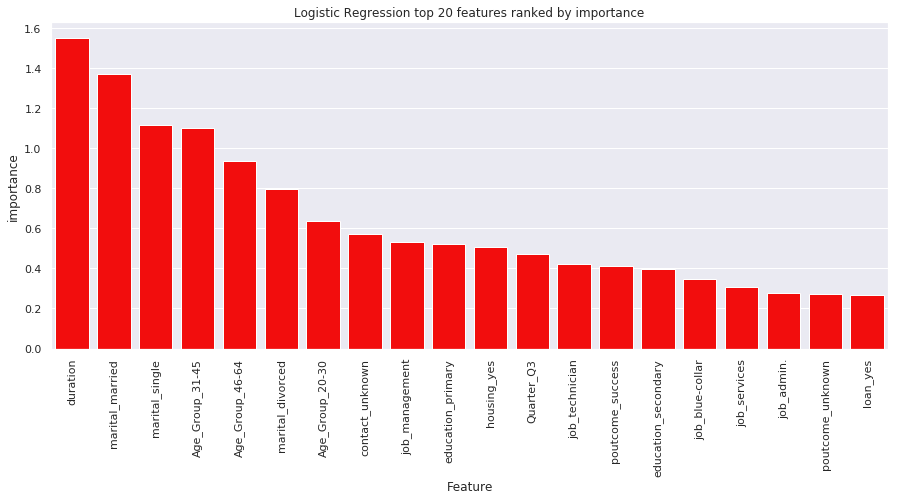

In [35]:
from sklearn.linear_model import LogisticRegression


# fit the model
#lr_clf.fit(X_train, y_train)
lr_clf.fit(X_train/ np.std(X_train, 0), y_train) #Scale the data before feature importance

# coefs
coefs = list(abs(lr_clf.coef_[0]))

# features
features = list(X_train.columns)


weights = pd.Series(coefs,index=features) 
top20 = abs(weights).sort_values(ascending = False).head(20) 


# zip them up
zipped = list(zip(features, coefs))

# create dictionary
coef_features = dict(zipped)

import operator
sorted_coef_features = sorted(coef_features.items(), key=operator.itemgetter(1), reverse=True)

topDF = weights[top20.index] 
#ax = topDF.head(n=20).plot(kind='bar',figsize = (14, 8), color = 'b')
f, ax = plt.subplots(figsize=(15, 6))

topDF=pd.DataFrame(topDF)
topDF.columns = ['importance']

print(topDF)

g = sns.barplot(topDF.index, y="importance", data=topDF, color="red", saturation=.9, ci=68)
g =plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('importance')
plt.title('Logistic Regression top 20 features ranked by importance')

**Random Forest**

                feature  importance
2              duration    0.277397
17          housing_yes    0.129648
12     marital_divorced    0.060982
20      contact_unknown    0.060181
14       marital_single    0.055214
13      marital_married    0.050304
24      Age_Group_31-45    0.041473
4                 pdays    0.039750
27           Quarter_Q3    0.039465
25      Age_Group_46-64    0.032067
26           Quarter_Q2    0.025934
18             loan_yes    0.024947
23      Age_Group_20-30    0.019396
16  education_secondary    0.019043
1                   day    0.015403
15    education_primary    0.013348
7       job_blue-collar    0.013245
3              campaign    0.011948
22     poutcome_unknown    0.011819
0               balance    0.011806


Text(0.5, 1.0, 'Random Forest Features importance')

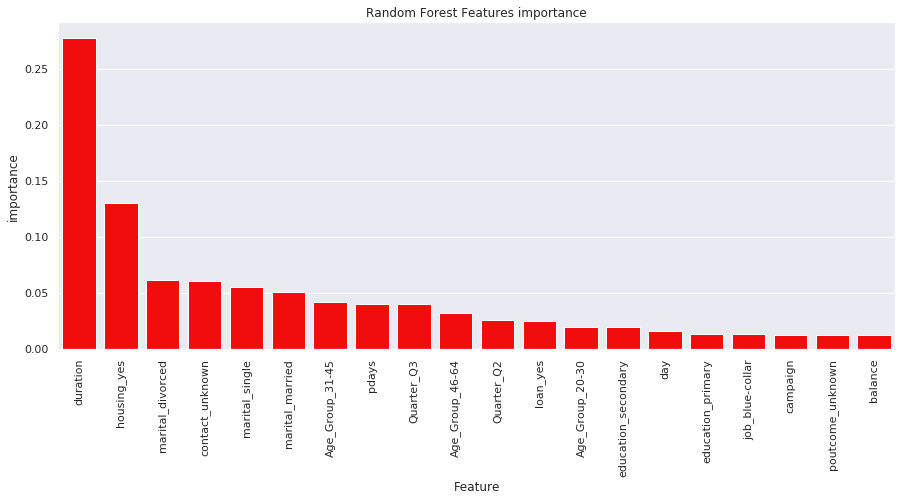

In [36]:
rf_clf.fit(X_train, y_train)
importances = pd.DataFrame({'feature':X_train.columns, 'importance': rf_clf.feature_importances_}) 
importances = importances.sort_values('importance',ascending=False)#.set_index('feature') 
 
#only display top 20 importances[:10].plot.bar()
topDF1 = importances.head(20)
print(topDF1)

f, ax = plt.subplots(figsize=(15, 6))

g = sns.barplot('feature', y="importance", data=topDF1, color="red", saturation=.9, ci=68)
g =plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('importance')
plt.title('Random Forest Features importance')

Above, top 20 most important features for both Logistic regression and Random Forest classifiers are shown. `duration`, ,`housing`, `marital status` and `age` top the features in terms of importance.



<div class="alert alert-info"><h3>
Evaluating Model Performance<a class="anchor" id="performance"></a>
</h3></div>

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
def plot_confusionMat(cv, model ='Logistic Regression'):
    plt.rcParams['figure.figsize'] = [7, 7]
    cm = confusion_matrix(y_test, cv.predict(X_test))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title(model+': Subscribed or Not Subscribed Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()


**Logistic Regression**

In [39]:
lr_clf_cv = lr_clf.fit(X_train, y_train)
print('Training Accuracy Score :',np.average(lr_training_scores) )
print('Test Accuracy Score :', accuracy_score(y_test,lr_clf_cv.predict(X_test)) )

Training Accuracy Score : 0.9178193335880863
Test Accuracy Score : 0.882261869654969


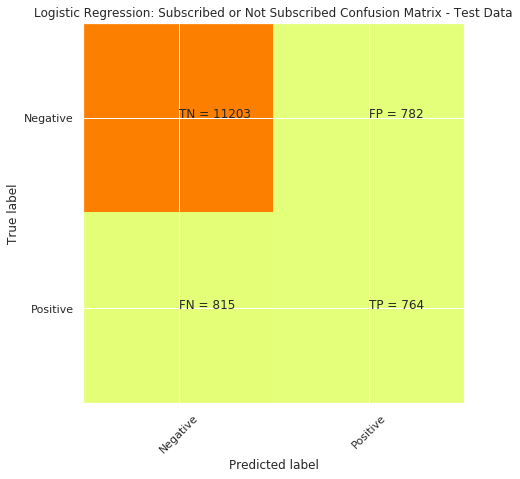

In [40]:
plot_confusionMat(lr_clf_cv, 'Logistic Regression')

**Random Forest**

In [41]:
rf_clf_cv = rf_clf.fit(X_train, y_train)
print('Training Accuracy Score :',np.average(rf_training_scores) )
print('Test Accuracy Score :', accuracy_score(y_test,rf_clf_cv.predict(X_test)) )

Training Accuracy Score : 0.9099258269408054
Test Accuracy Score : 0.8685491005603067


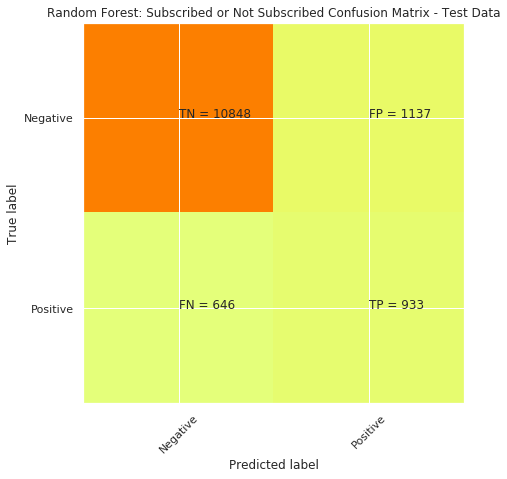

In [42]:
plot_confusionMat(rf_clf_cv, 'Random Forest')

**Training vs Test accuracy Summary**

|Model|Training Accuracy|Testing Accuracy|
|-----|-----|----|
|Logistic Regression|92.67%|89.5%|
|Random Forest|91.15%|86.61%|

Test accuracies are slightly lower than training accuracies for both logistic regression indicating potential over fitting.

<div class="alert alert-info"><h3>
Conclusion<a class="anchor" id="conclusion"></a>
</h3></div>


**Recommendations:**  Longer duration, contacts via a cellular phone, contacts without an existing loan, and prior campaign success were the most significant variables in predicting a subscription success. It is recommended to expand on techniques to extend the duration of the conversation; to increase contact with people that had cellular phone (more time to talk); to focus on those that do not have a loan with bank (perhaps extra cash to subscribe); and finally, to find more contacts where the prior campaign was successful (there were only contacted 75 individuals with a prior successful “poutcome” in the training set).


<div class="alert alert-info"><h3>
Reference<a class="anchor" id="reference"></a>
</h3></div>

1. UC Irvine Machine Learning Repository
2. [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
3. http://www.columbia.edu/~jc4133/ADA-Project.pdf